In [ ]:
Build 2 regression or classification problems (Use any dataset)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import random


# Import the Python machine learning libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score





In [5]:
#import data
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
fruits.shape

(59, 7)

In [ ]:
#Checking the Null value

In [10]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [11]:
#checking for null
fruits.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [ ]:
#checking for duplicate rows

In [12]:
fruits.duplicated().sum()

0

In [13]:
fruits.dtypes


fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [16]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


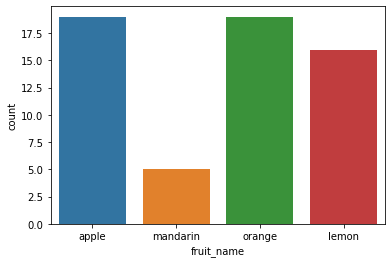

In [14]:
#visualization
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

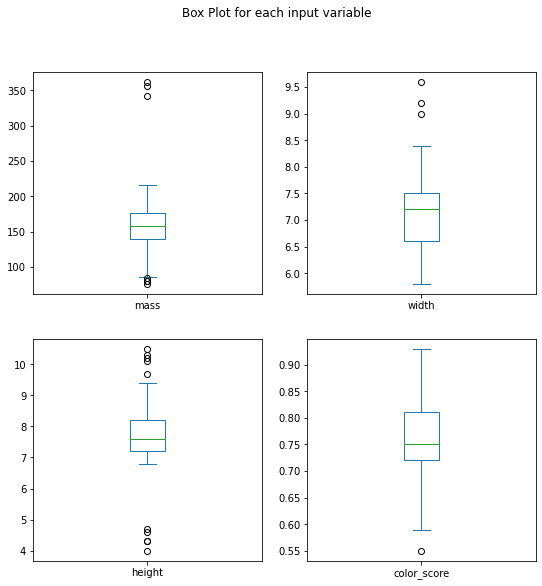

In [17]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

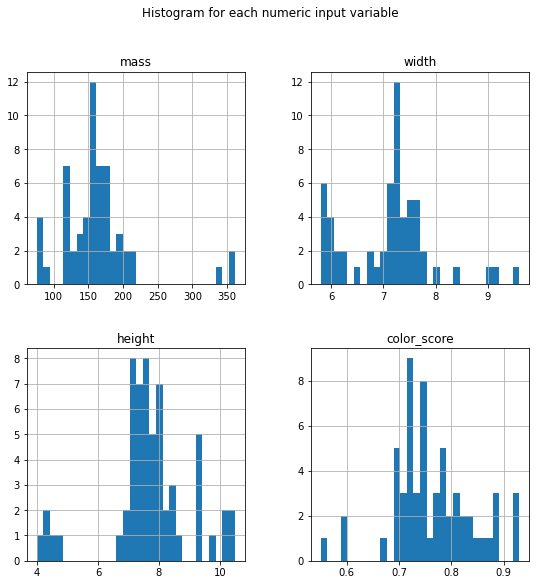

In [18]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

In [6]:
features = ['mass', 'width', 'height', 'color_score']
target = ['fruit_label']

X = fruits[features]
Y = fruits[target]

In [7]:
Y.fruit_label.unique()

array([1, 2, 3, 4], dtype=int64)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<Figure size 1440x1440 with 0 Axes>

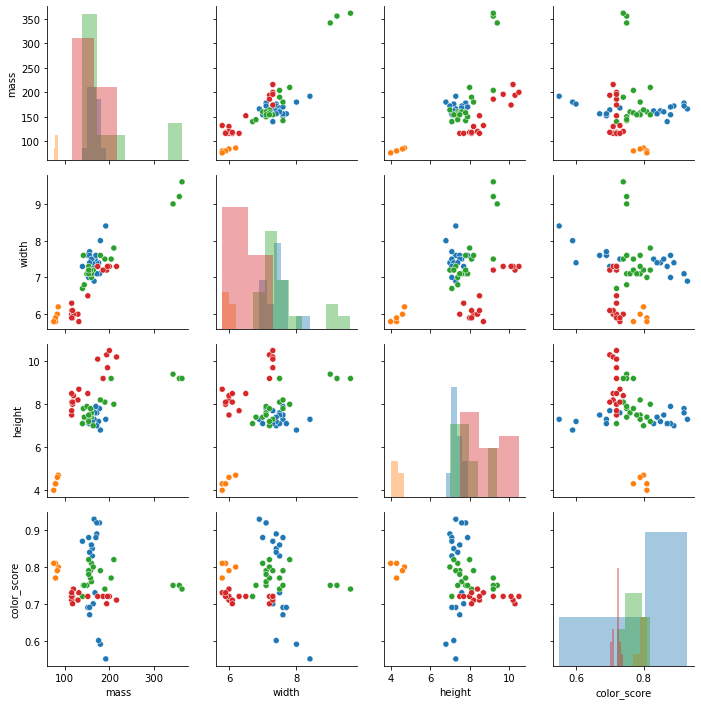

In [9]:
plt.figure(figsize=(20, 20))
plot = sns.PairGrid(fruits, x_vars=features, y_vars=features, hue='fruit_name')
plot.map_diag(sns.distplot, kde=False)
plot.map_offdiag(sns.scatterplot)

In [11]:
#splitting of data
X_train, X_valid, y_train, y_valid = train_test_split(X, Y)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(44, 4) (44, 1)
(15, 4) (15, 1)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.pipeline import Pipeline


random_state=42
max_leaf_nodes=10
n_estimators=10


tree_pipeline = Pipeline(steps=[
    ('model', DecisionTreeClassifier(random_state=random_state, max_leaf_nodes=max_leaf_nodes))
])

forest_pipeline = Pipeline(steps=[
    ('model', RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, max_leaf_nodes=max_leaf_nodes))
])

xgboost_pipeline = Pipeline(steps=[
    ('model', XGBRFClassifier(random_state=random_state, max_depth=max_leaf_nodes))
])

tree_scores = cross_val_score(tree_pipeline, X, Y, cv=3, scoring='accuracy', verbose=False)
forest_scores = cross_val_score(forest_pipeline, X, Y, cv=3, scoring='accuracy', verbose=False)
xgboost_scores = cross_val_score(xgboost_pipeline, X, Y, cv=3, scoring='accuracy', verbose=False)

tree_mean_acc = tree_scores.mean()
forest_mean_acc = forest_scores.mean()
xgboost_mean_acc = xgboost_scores.mean()

E:\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\anaconda\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
E:\anaconda\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
E:\anaconda\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  s

[11:40:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\xgboost\data.py:25

[11:40:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:40:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
print(f'Decision tree accuracy: {tree_mean_acc}')
print(f'Random Forest accuracy: {forest_mean_acc}')
print(f'XGBoost accuracy: {xgboost_mean_acc}')

Decision tree accuracy: 0.8640350877192983
Random Forest accuracy: 0.8315789473684211
XGBoost accuracy: 0.8649122807017545
